In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Gauss-Jordan

In [41]:
def gauss_jordan(A):
    # Convertimos la matriz A a su forma escalonada reducida por filas
    A = A.astype(float)  # Convertir a punto flotante
    n, m = A.shape
    for i in range(n):
        # Buscamos el primer pivote no nulo en la columna i
        pivot_row = i
        while pivot_row < n and A[pivot_row, i] == 0:
            pivot_row += 1

        # Si no encontramos un pivote no nulo, continuamos con la siguiente columna
        if pivot_row == n:
            continue

        # Intercambiamos la fila actual con la fila del pivote
        A[[i, pivot_row]] = A[[pivot_row, i]]

        # Hacemos que el pivote sea 1
        pivot = A[i, i]
        A[i, :] /= pivot

        # Hacemos ceros en las otras filas
        for j in range(n):
            if i != j:
                factor = A[j, i]
                A[j, :] -= factor * A[i, :]

    return A

# Ejemplo de uso
matriz_ejemplo = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Aplicamos el método de Gauss-Jordan
matriz_resultante = gauss_jordan(matriz_ejemplo)

# Imprimir el resultado
print("Matriz resultante:")
print(matriz_resultante)

Matriz resultante:
[[ 1.  0. -1.]
 [-0.  1.  2.]
 [ 0.  0.  0.]]


# Rotación Matrices

Vector original:
[[3]
 [4]]
Vector después de la rotación:
[[-4.]
 [ 3.]]


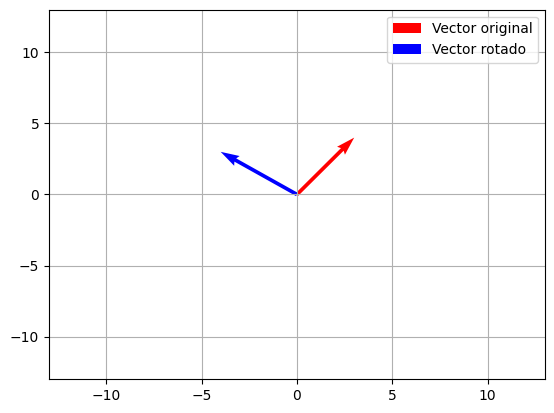

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def rot(v, ang):
    # Convierte el ángulo de grados a radianes
    ang_rad = ang * np.pi / 180

    # Matriz de rotación 2D
    rot = np.array([[np.cos(ang_rad), -np.sin(ang_rad)], [np.sin(ang_rad), np.cos(ang_rad)]])

    # Aplica la rotación a un vector v
    return np.matmul(rot, v)

# Ángulo de rotación en grados
ang = 90

# Crea un vector v aleatorio de dimensiones 2x1
v = np.random.randint(0, 10, (2, 1))
print("Vector original:")
print(v)

# Aplica la rotación al vector v
w = rot(v, ang)
print("Vector después de la rotación:")
print(w)

# Configuración para visualización de vectores usando matplotlib
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector original')
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector rotado')

# Ajusta los límites del gráfico
plt.xlim(-(v[0] + 10), v[0] + 10)
plt.ylim(-(v[0] + 10), v[0] + 10)

# Muestra la cuadrícula en el gráfico
plt.grid(True)

# Muestra la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

## Diagonalización

In [43]:
def diagonalizar(matriz):
    # Obtener los autovalores y autovectores
    autovalores, autovectores = np.linalg.eig(matriz)

    # Construir la matriz P con los autovectores como columnas
    P = autovectores

    # Construir la matriz inversa de P
    P_inv = np.linalg.inv(P)

    # Obtener la matriz diagonal D
    D = np.diag(autovalores)

    # Verificar que P_inv * A * P sea diagonal
    diagonalizada = np.allclose(P_inv @ matriz @ P, D)

    return P, D, P_inv, diagonalizada

# Ejemplo de uso
matriz_ejemplo = np.array([[2, 1], [1, 3]])

# Diagonalizar la matriz
P, D, P_inv, diagonalizada = diagonalizar(matriz_ejemplo)

# Imprimir resultados
print("Matriz original:")
print(matriz_ejemplo)

print("\nMatriz diagonal:")
print(D)

print("\nMatriz P:")
print(P)

print("\nMatriz inversa de P:")
print(P_inv)

print("\n¿La matriz fue diagonalizada correctamente?", diagonalizada)

Matriz original:
[[2 1]
 [1 3]]

Matriz diagonal:
[[1.38196601 0.        ]
 [0.         3.61803399]]

Matriz P:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

Matriz inversa de P:
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]

¿La matriz fue diagonalizada correctamente? True
